In [1]:
! pip install pandas
! pip install numpy
! pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
! pip install tensorflow
! pip install setuptools


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [55]:
from PIL import Image

In [3]:
dataset = pd.read_csv('data/labels.csv')

In [4]:
display(dataset)

id                     breed
0      000bec180eb18c7604dcecc8fe0dba07               boston_bull
1      001513dfcb2ffafc82cccf4d8bbaba97                     dingo
2      001cdf01b096e06d78e9e5112d419397                  pekinese
3      00214f311d5d2247d5dfe4fe24b2303d                  bluetick
4      0021f9ceb3235effd7fcde7f7538ed62          golden_retriever
...                                 ...                       ...
10217  ffd25009d635cfd16e793503ac5edef0                    borzoi
10218  ffd3f636f7f379c51ba3648a9ff8254f            dandie_dinmont
10219  ffe2ca6c940cddfee68fa3cc6c63213f                  airedale
10220  ffe5f6d8e2bff356e9482a80a6e29aac        miniature_pinscher
10221  fff43b07992508bc822f33d8ffd902ae  chesapeake_bay_retriever

[10222 rows x 2 columns]

In [56]:
trainfiles = []
for (dirpath, dirnames, filename) in os.walk('data/train'):
    trainfiles.extend(filename)
    break

In [6]:
print(trainfiles)

['000bec180eb18c7604dcecc8fe0dba07.jpg', '001513dfcb2ffafc82cccf4d8bbaba97.jpg', '001cdf01b096e06d78e9e5112d419397.jpg', '00214f311d5d2247d5dfe4fe24b2303d.jpg', '0021f9ceb3235effd7fcde7f7538ed62.jpg', '002211c81b498ef88e1b40b9abf84e1d.jpg', '00290d3e1fdd27226ba27a8ce248ce85.jpg', '002a283a315af96eaea0e28e7163b21b.jpg', '003df8b8a8b05244b1d920bb6cf451f9.jpg', '0042188c895a2f14ef64a918ed9c7b64.jpg', '004396df1acd0f1247b740ca2b14616e.jpg', '0067dc3eab0b3c3ef0439477624d85d6.jpg', '00693b8bc2470375cc744a6391d397ec.jpg', '006cc3ddb9dc1bd827479569fcdc52dc.jpg', '0075dc49dab4024d12fafe67074d8a81.jpg', '00792e341f3c6eb33663e415d0715370.jpg', '007b5a16db9d9ff9d7ad39982703e429.jpg', '007b8a07882822475a4ce6581e70b1f8.jpg', '007ff9a78eba2aebb558afea3a51c469.jpg', '008887054b18ba3c7601792b6a453cc3.jpg', '008b1271ed1addaccf93783b39deab45.jpg', '008ba178d6dfc1a583617470d19c1673.jpg', '009509be3ca7cce0ff9e37c8b09b1125.jpg', '0097c6242c6f3071762d9f85c3ef1b2f.jpg', '00a338a92e4e7bf543340dc849230e75.jpg',

In [7]:
uniquelabels = dataset['breed'].unique()

In [8]:
# for x in uniquelabels:
#     os.mkdir(f'processeddata/{x}')

In [9]:
import shutil

In [ ]:
def movedfile(source, files):
    for x in files:
        id = x.split('.')[0]
        # print(id)
        result = dataset.loc[(dataset == id).any(axis=1)]
        dir = result['breed'].tolist()[0]
        
        s_dir = f'{source}/{x}'
        d_dir = f'processeddata/{dir}/'
        shutil.copy(s_dir, d_dir)

In [57]:
def convert_image_to_tensor(path):
    img = Image.open(path)
    img = img.convert("L")  # Convert image to grayscale
    img = img.resize([224, 224])  # Resize to 224x224
    img = np.asarray(img)  # Convert to numpy array
    img = img / 255.0 if img.dtype != np.float32 else img  # Normalize the image
    img = np.expand_dims(img, axis=-1)  # Add channel dimension
    return img

In [58]:
images_list = []
labels_list = []
labels_map = {}
label_val = 0
i = 'processeddata'

for folder in os.listdir(i):
    labels_map[label_val] = folder
    for file in os.listdir(i + '/' + folder):
        images_list.append(i + '/' + folder + '/' + file)
        labels_list.append(label_val)
    label_val += 1

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array

In [21]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
# # data augmentation

# i = 'processeddata'

# for folder in os.listdir(i):
#     folder_dir = os.path.join(i, folder)
#     if not os.path.isdir(folder_dir):  # Skip if it's not a folder
#         continue

#     for file in os.listdir(folder_dir):
#         img_path = os.path.join(folder_dir, file)
#         try:
#             # Open the image
#             img = Image.open(img_path)
            
#             # Convert the image to a NumPy array and expand dimensions
#             img_array = img_to_array(img)  # Convert to NumPy array
#             img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

#             # Generate augmented images
#             augmented_images = datagen.flow(img_array, batch_size=1)

#             for idx in range(3):  # Generate 5 augmented images
#                 aug_img = next(augmented_images)[0].astype(np.uint8)
                
#                 # Save the augmented image
#                 save_path = os.path.join(folder_dir, f"aug_{idx}_{file}")
#                 aug_img_pil = array_to_img(aug_img)
#                 aug_img_pil.save(save_path)

#         except Exception as e:
#             print(f"Error processing {img_path}: {e}")

In [ ]:
# import os
# import datetime

# from datetime import timedelta

# # Specify the folder to search
# i = 'processeddata'
# today = datetime.date.today()

# yesterday = today - timedelta(days = 1)

# for folder in os.listdir(i):
#     folder_dir = os.path.join(i, folder)
#     # Iterate through files in the folder
#     for filename in os.listdir(folder_dir):
#         file_path = os.path.join(folder_dir, filename)

#         # Skip if it's a directory
#         if os.path.isdir(file_path):
#             continue

#         # Get the file's creation or modification time
#         file_time = datetime.date.fromtimestamp(os.path.getctime(file_path))  # For creation time
#         # file_time = datetime.date.fromtimestamp(os.path.getmtime(file_path))  # For modification time

#         # Check if the file was created today
#         if file_time == yesterday:
#             try:
#                 os.remove(file_path)  # Delete the file
#                 print(f"Deleted: {file_path}")
#             except Exception as e:
#                 print(f"Error deleting {file_path}: {e}")


Deleted: processeddata\affenpinscher\aug_0_00ca18751837cd6a22813f8e221f7819.jpg
Deleted: processeddata\affenpinscher\aug_0_01268f0007876a692907bda89468184c.jpg
Deleted: processeddata\affenpinscher\aug_0_0162107acd8f2588c0944b791d61bb0c.jpg
Deleted: processeddata\affenpinscher\aug_0_040fef64640b89c53f161b6c5215b78b.jpg
Deleted: processeddata\affenpinscher\aug_0_0484a6cc686a07e1edacd0fb44b1d965.jpg
Deleted: processeddata\affenpinscher\aug_0_100f347ec78a42a9e7c2418e4beb3f6a.jpg
Deleted: processeddata\affenpinscher\aug_0_106d7e0df869e7ba9f6d16c5f77ddfb8.jpg
Deleted: processeddata\affenpinscher\aug_0_10edc6f98c2423e4e195e09a86b0d292.jpg
Deleted: processeddata\affenpinscher\aug_0_11b60d8d86f14a601ca290909a17cbc6.jpg
Deleted: processeddata\affenpinscher\aug_0_18b4e732c105272f40956c2f85813bcb.jpg
Deleted: processeddata\affenpinscher\aug_0_19a8c1698819d382c3ead14bdc1a360b.jpg
Deleted: processeddata\affenpinscher\aug_0_19de1db12b3ddc7f2af6d9453c977083.jpg
Deleted: processeddata\affenpinscher\aug

In [38]:
layers = tf.keras.layers.CategoryEncoding(num_tokens=len(list(set(labels_list))), output_mode="one_hot")
labels_list = np.array(layers(labels_list))
images_list = np.array([convert_image_to_tensor(i) for i in images_list])

In [39]:
display(images_list)

array([[[[0.49803922],
         [0.49411765],
         [0.49019608],
         ...,
         [0.68235294],
         [0.6627451 ],
         [0.65882353]],

        [[0.50980392],
         [0.50196078],
         [0.49803922],
         ...,
         [0.69803922],
         [0.68235294],
         [0.67843137]],

        [[0.52156863],
         [0.51372549],
         [0.50980392],
         ...,
         [0.69803922],
         [0.69019608],
         [0.67843137]],

        ...,

        [[0.21960784],
         [0.24705882],
         [0.23921569],
         ...,
         [0.14509804],
         [0.16470588],
         [0.19607843]],

        [[0.2       ],
         [0.25882353],
         [0.25882353],
         ...,
         [0.14509804],
         [0.16470588],
         [0.21960784]],

        [[0.19607843],
         [0.26666667],
         [0.2627451 ],
         ...,
         [0.14117647],
         [0.15294118],
         [0.21568627]]],


       [[[0.32941176],
         [0.40392157],
         [0.43

In [40]:
! pip install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
from sklearn.model_selection import train_test_split

In [59]:
xtrain, xvalidate, ytrain, yvalidate = train_test_split(images_list, labels_list, test_size=0.2, random_state=42)

In [60]:
datagen = ImageDataGenerator(rescale=1.0/255.0)

In [61]:
# Create the training and validation generators
train_generator = datagen.flow_from_directory(
    'processeddata', 
    target_size=(224, 224), 
    color_mode='grayscale',  # Grayscale since we convert images to grayscale
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

validate_generator = datagen.flow_from_directory(
    'processeddata', 
    target_size=(224, 224), 
    color_mode='grayscale', 
    batch_size=32, 
    class_mode='categorical',
    shuffle=False
)

Found 40888 images belonging to 120 classes.
Found 40888 images belonging to 120 classes.


In [43]:
from tensorflow.keras import models

In [49]:
display(xtrain.shape)

(32710, 224, 224, 1)

In [45]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [62]:
model = tf.keras.models.Sequential()

model.add(Conv2D(
    filters = 6,
    kernel_size = 5,
    strides = 1,
    input_shape = (224,224,1),
    activation =  tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.BatchNormalization())

model.add(MaxPooling2D(
    pool_size = (2,2)
))

model.add(Conv2D(
    filters = 16,
    kernel_size = 5,
    strides = 1,
    activation =  tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))
model.add(tf.keras.layers.BatchNormalization())

model.add(MaxPooling2D(
    pool_size = (2,2)
))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(
    units = 200,
    activation = tf.keras.activations.relu
))
model.add(tf.keras.layers.BatchNormalization())

model.add(Dropout(0.2))

model.add(Dense(
    units = 120, 
    activation = tf.keras.activations.softmax,
    kernel_initializer = tf.keras.initializers.VarianceScaling()
))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 220, 220, 6)    │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 220, 220, 6)    │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 110, 110, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 106, 106, 16)   │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 106, 106, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 53, 53, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 53, 53, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 44944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 200)            │     8,989,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 200)            │           800 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 120)            │        24,120 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,016,580 (34.40 MB)

 Trainable params: 9,016,136 (34.39 MB)

 Non-trainable params: 444 (1.73 KB)

In [63]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer = adam_optimizer,
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [64]:
training_history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validate_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_steps=validate_generator.samples // 32
)

d:\fnclick\python\ml\dogbreedidentification\env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1277/1277 ━━━━━━━━━━━━━━━━━━━━ 387s 299ms/step - accuracy: 0.0248 - loss: 4.8273 - val_accuracy: 0.1005 - val_loss: 4.1270
Epoch 2/10
1277/1277 ━━━━━━━━━━━━━━━━━━━━ 0s 49us/step - accuracy: 0.0625 - loss: 4.2255 - val_accuracy: 0.0000e+00 - val_loss: 4.5327
Epoch 3/10


C:\Program Files\Python312\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


1277/1277 ━━━━━━━━━━━━━━━━━━━━ 299s 234ms/step - accuracy: 0.1182 - loss: 4.0021 - val_accuracy: 0.4748 - val_loss: 2.7008
Epoch 4/10
1277/1277 ━━━━━━━━━━━━━━━━━━━━ 0s 22us/step - accuracy: 0.0938 - loss: 3.9996 - val_accuracy: 0.2083 - val_loss: 3.4699
Epoch 5/10
1277/1277 ━━━━━━━━━━━━━━━━━━━━ 300s 235ms/step - accuracy: 0.4504 - loss: 2.5195 - val_accuracy: 0.9153 - val_loss: 0.6318
Epoch 6/10
1277/1277 ━━━━━━━━━━━━━━━━━━━━ 0s 22us/step - accuracy: 0.2812 - loss: 2.7660 - val_accuracy: 0.8333 - val_loss: 1.1139
Epoch 7/10
1277/1277 ━━━━━━━━━━━━━━━━━━━━ 302s 236ms/step - accuracy: 0.8391 - loss: 0.7917 - val_accuracy: 0.9897 - val_loss: 0.0827
Epoch 8/10
1277/1277 ━━━━━━━━━━━━━━━━━━━━ 0s 22us/step - accuracy: 0.5625 - loss: 2.0118 - val_accuracy: 0.9583 - val_loss: 0.1944
Epoch 9/10
1277/1277 ━━━━━━━━━━━━━━━━━━━━ 303s 237ms/step - accuracy: 0.9444 - loss: 0.2582 - val_accuracy: 0.9965 - val_loss: 0.0345
Epoch 10/10
1277/1277 ━━━━━━━━━━━━━━━━━━━━ 0s 32us/step - accuracy: 0.8750 - loss:

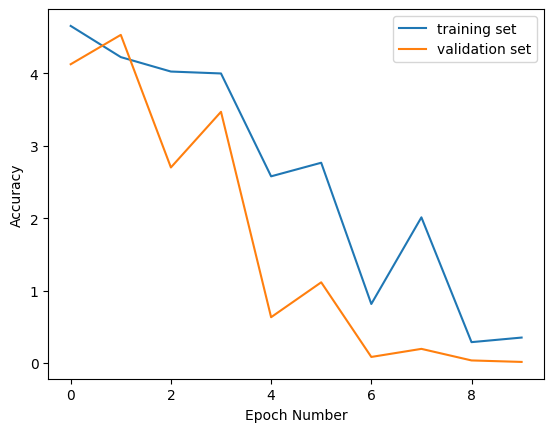

In [65]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='validation set')
plt.legend()

In [66]:
model.save('dogbreedidentification.keras')

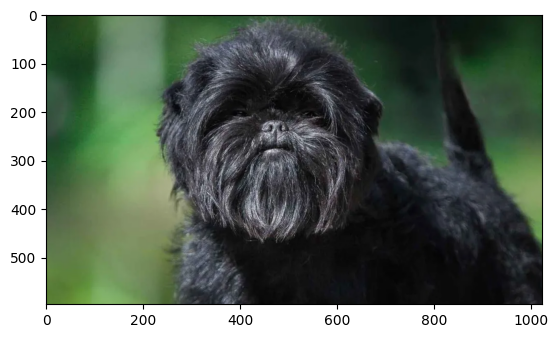

In [67]:
import matplotlib.image as mpimg
img = mpimg.imread('dogimg.png')
imgplot = plt.imshow(img)
plt.show()

In [68]:
img = convert_image_to_tensor('dogimg.png')
loaded_model = tf.keras.models.load_model('dogbreedidentification.keras')

In [69]:
# print(img)
img = tf.expand_dims(img, axis=0)
print(img.shape)

(1, 224, 224, 1)


In [70]:
predict = loaded_model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


In [71]:
print(labels_map[np.argmax(predict)])

print(img)

rottweiler
tf.Tensor(
[[[[0.18823529]
   [0.18431373]
   [0.17647059]
   ...
   [0.14117647]
   [0.14117647]
   [0.14117647]]

  [[0.18823529]
   [0.18431373]
   [0.17647059]
   ...
   [0.14117647]
   [0.14117647]
   [0.14117647]]

  [[0.18823529]
   [0.18823529]
   [0.18039216]
   ...
   [0.14509804]
   [0.14509804]
   [0.1372549 ]]

  ...

  [[0.41568627]
   [0.41960784]
   [0.42352941]
   ...
   [0.13333333]
   [0.09803922]
   [0.11372549]]

  [[0.41960784]
   [0.42352941]
   [0.42352941]
   ...
   [0.14901961]
   [0.10980392]
   [0.12156863]]

  [[0.41960784]
   [0.42352941]
   [0.42352941]
   ...
   [0.1372549 ]
   [0.10588235]
   [0.11764706]]]], shape=(1, 224, 224, 1), dtype=float64)
